In [6]:
from sys import argv
import pandas as pd
import numpy as np
import pylab
%matplotlib inline

In [7]:
df4 = pd.read_csv('LRubi4/sizeDistri_all100_average.txt', sep='\t', header=None, names = ['beta', 'NSIM', 'LSIM', 'mean', 'std'])
df6 = pd.read_csv('LRubi6/sizeDistri_all100_average.txt', sep='\t', header=None, names = ['beta', 'NSIM', 'LSIM', 'mean', 'std'])
df8 = pd.read_csv('LRubi8/sizeDistri_all100_average.txt', sep='\t', header=None, names = ['beta', 'NSIM', 'LSIM', 'mean', 'std'])
df = pd.concat([df4, df6, df8])

In [8]:
concentration = df['NSIM']*df['LSIM']/2500.0
df['concentration'] = concentration

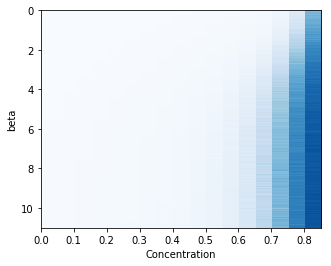

In [9]:
fig, ax = pylab.subplots()
k = df[df.LSIM==3].set_index(['concentration', 'beta']).drop(['LSIM', 'std','NSIM'], axis=1).unstack('concentration')
kk = k.values
ff = ax.imshow(kk, vmin=0, vmax=4250, extent=[0,0.85,11,0],cmap='Blues')
ax.set_aspect(150/2500.0)
pylab.xlabel('Concentration')
pylab.ylabel('beta')

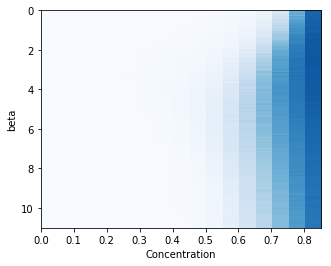

In [10]:
fig, ax = pylab.subplots()
k = df[df.LSIM==4].set_index(['concentration', 'beta']).drop(['LSIM', 'std','NSIM'], axis=1).unstack('concentration')
kk = k.values
ff = ax.imshow(kk, vmin=0, vmax=4250, extent=[0,0.85,11,0],cmap='Blues')
ax.set_aspect(150/2500.0)
pylab.xlabel('Concentration')
pylab.ylabel('beta')

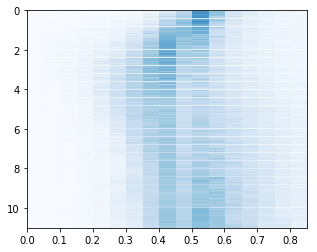

In [11]:
fig, ax = pylab.subplots()
k = df[df.LSIM==8].set_index(['concentration', 'beta']).drop(['LSIM', 'mean','NSIM'], axis=1).unstack('concentration')
kk = k.values
ff = ax.imshow(kk, vmin=0, vmax=max(df['std']), extent=[0,0.85,11,0],cmap='Blues')
ax.set_aspect(150/2500.0)

# Maximal fluctuation

In [12]:
def maximal_fluc(L):
    values = df[df.LSIM==L].set_index(['concentration', 'beta']).drop(['LSIM', 'mean','NSIM'], axis=1).unstack('concentration').values
    kkk = values.argmax(axis=1)
    c = df[df.LSIM==L].concentration.values
    c = np.array(sorted(list(set(c))))
    x = c[kkk]
    y = df[df.LSIM==L].beta.values
    y = np.array(sorted(list(set(y))))
    return x, y

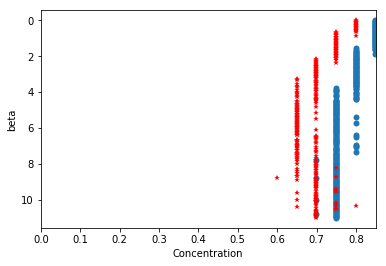

In [13]:
L = 3
x, y = maximal_fluc(L)
pylab.gca().invert_yaxis()
pylab.plot(x,y, 'o', markeredgewidth=0.0)

x, y = maximal_fluc(L+1)
pylab.plot(x,y, 'r*', markeredgewidth=0.0)
pylab.xlim([0,0.85])
pylab.xlabel('Concentration')
pylab.ylabel('beta')

# Mean clustering

In [14]:
def mean_clust(L):
    values = df[df.LSIM==L].set_index(['concentration', 'beta']).drop(['LSIM', 'std','NSIM'], axis=1).unstack('concentration').values
    normalized = abs(values - values.mean(axis=1)[:,None])
    kkk = normalized.argmin(axis=1)
    c = df[df.LSIM==L].concentration.values
    c = np.array(sorted(list(set(c))))
    x = c[kkk]
    y = df[df.LSIM==L].beta.values
    y = np.array(sorted(list(set(y))))
    return x, y

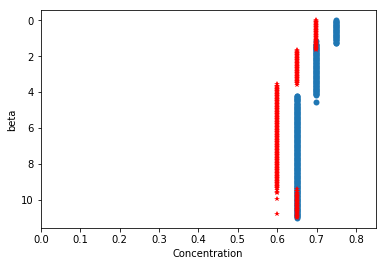

In [15]:
L = 3
x, y = mean_clust(L)
pylab.gca().invert_yaxis()
pylab.plot(x,y, 'o', markeredgewidth=0.0)

x, y = mean_clust(L+1)
pylab.plot(x,y, 'r*', markeredgewidth=0.0)
pylab.xlim([0,0.85])
pylab.xlabel('Concentration')
pylab.ylabel('beta')

# Rbf fit

In [16]:
from scipy import interpolate
from matplotlib import cm

In [17]:
def rbf_fit(L):
    ddd = df[df.LSIM==L].set_index(['concentration', 'beta']).drop(['LSIM', 'mean','NSIM'], axis=1).reset_index()

    rawval = ddd.values
    xi = rawval[:,0]
    yi = rawval[:,1]
    zi = rawval[:,2]
    tck = interpolate.Rbf(xi, yi, zi, function='multiquadric', smooth=0.1, epsilon=0.1)

    xs = np.linspace(0, 0.8, 100)
    ys = np.linspace(0, 11, 100)

    xg, yg = np.mgrid[0:0.8:100j, 0:11:100j]
    zg = tck(xg, yg)

    kk = np.argmax(zg, axis=0)
    x = xs[kk]
    y = ys
    return x, y

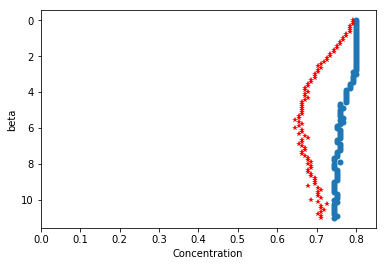

In [18]:
L = 3
x, y = rbf_fit(L)
pylab.gca().invert_yaxis()
pylab.plot(x,y, 'o', markeredgewidth=0.0)

x, y = rbf_fit(L+1)
pylab.plot(x,y, 'r*', markeredgewidth=0.0)
pylab.xlim([0,0.85])
pylab.xlabel('Concentration')
pylab.ylabel('beta')

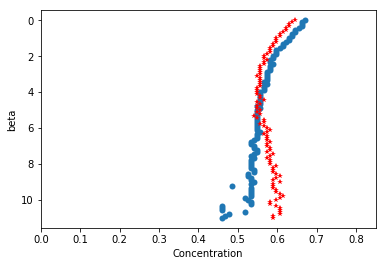

In [19]:
L = 5
x, y = rbf_fit(L)
pylab.gca().invert_yaxis()
pylab.plot(x,y, 'o', markeredgewidth=0.0)

x, y = rbf_fit(L+1)
pylab.plot(x,y, 'r*', markeredgewidth=0.0)
pylab.xlim([0,0.85])
pylab.xlabel('Concentration')
pylab.ylabel('beta')

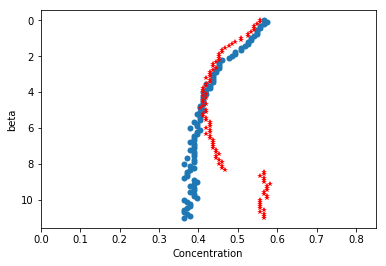

In [20]:
L = 7
x, y = rbf_fit(L)
pylab.gca().invert_yaxis()
pylab.plot(x,y, 'o', markeredgewidth=0.0)

x, y = rbf_fit(L+1)
pylab.plot(x,y, 'r*', markeredgewidth=0.0)
pylab.xlim([0,0.85])
pylab.xlabel('Concentration')
pylab.ylabel('beta')

In [21]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import UnivariateSpline


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

In [110]:
def gaussian_fit(L):
    ddd = df[df.LSIM==L].set_index(['concentration', 'beta']).drop(['LSIM', 'mean','NSIM'], axis=1).reset_index()
    Ts = []
    x0s = []
    unique = np.unique(ddd.beta.values)
    index = np.arange(10,280,10)
    values = np.take(unique, index)
    for T in values:
        aaa = ddd[ddd.beta==T].drop('beta', axis=1).values
        popt,_ = curve_fit(gaus,aaa[:,0],aaa[:,1])
        a, x0, sigma = popt
        Ts.append(T)
        x0s.append(x0)
    return x0s, Ts

In [373]:
def myspline(x,y,kinkpoint):
    s = UnivariateSpline(x, y,s=5, k=3)
    x_smooth = pylab.linspace(0, kinkpoint, 100)
    y_smooth = s(x_smooth)
    return x_smooth, y_smooth

In [374]:
def AddFictPoint(x,y,kinkpoint,xgap):
    xlast=x[-1]
    ylast=y[-1]
    newpointy = np.linspace(kinkpoint,11,100)
    newpointx = np.linspace(xlast,xlast+xgap,100)
    x = np.append(x,newpointx)
    y = np.append(y,newpointy)

    return x,y

In [395]:
def PlotBoundary(L, panel,kinkpoint1,kinkpoint2,xgap):
    
    colors = [ '#009e73','#d55e00']
    fig, ax = pylab.subplots()
    
    pylab.gca().invert_yaxis()
    
    for L,color,label,kinkpoint in list(zip([L,L+1],colors,['o','r*'],[kinkpoint1,kinkpoint2])):
    
        x, y = gaussian_fit(L)
        pylab.plot(x,y, label, markeredgewidth=1,markerfacecolor='None',markeredgecolor=color)
        coordinates = list(zip(x,y))
        coordinates = sorted(coordinates, key=lambda x: x[1])
        x,y=zip(*coordinates)
        y_smooth, x_smooth = myspline(y,x,kinkpoint)
        x_smooth, y_smooth = AddFictPoint(x_smooth, y_smooth,kinkpoint,xgap)
        pylab.plot(x_smooth,y_smooth,color=color,linewidth=3)
    
    pylab.xlim([0,0.85])
    pylab.rc('xtick', labelsize=0)
    pylab.rc('ytick', labelsize=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', direction='in')

    #pylab.xlabel('Concentration')
    #pylab.ylabel('beta')
    pylab.savefig('/Users/guanhuahe/Desktop/jonikas_lab/Simulation_Rubisco/paper_figures/fig3/'+panel+'.png',dpi=500)

In [396]:
np.arange(10.1,11,100)

array([ 10.1])

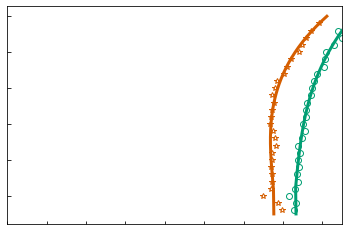

In [406]:
PlotBoundary(3,'d',9.5,9.5,0.001)

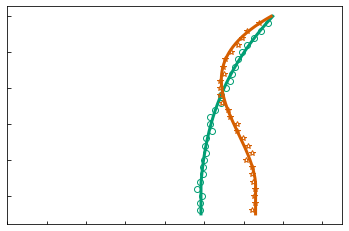

In [384]:
PlotBoundary(5,'e',9.3,9.3,0)

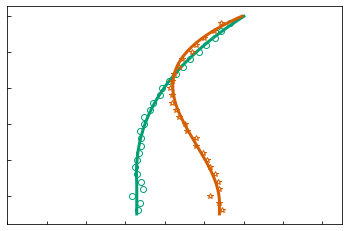

In [389]:
PlotBoundary(7,'f',9.3,10.5,0)

# get rid of 10% top/bottom

In [17]:
popt

array([ 23.71675402,   0.51523527,  -0.13239702])

# split data into groups